<a href="https://colab.research.google.com/github/metbrian/DSPS_BFrei/blob/main/HW10/hw10_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
#import glob
import pylab as pl
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)

In [3]:
from tensorflow import keras
from keras import optimizers

In [4]:
from keras.datasets import mnist
#Load in y (actualy digit) data also for prediction
(x_train, y_train), (x_test, y_test) = mnist.load_data()

ndim = x_train.shape[1]**2

x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
from tensorflow.keras.utils import to_categorical
num_classes = 10
#convert y data into categorical variable for classification in neural network
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [6]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [7]:
x_test.shape, y_test.shape

((10000, 784), (10000, 10))

In [8]:
x_train.dtype, x_train.max(), x_train.min()

(dtype('float64'), 1.0, 0.0)

In [9]:
xshape = x_train.shape[1]

In [18]:
model = Sequential()
## encoder
# input layer
model.add(Dense(256, activation='relu', input_dim=ndim))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#Don't need decoder here, as we did for reproducing the images in the exercise

# output layer for only classification - 10 neurons
model.add(Dense(num_classes, activation='sigmoid'))

#Found most success with a very small learning rate, and a categorical
#loss function. 
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt)
#Use x_train and y_train here to train it using actual digits
history = model.fit(x_train, y_train, 
                               validation_data=(x_train, y_train),
                               epochs=20, batch_size=80, verbose=1,
                               callbacks=[callback])



Epoch 1/20
750/750 [==============================] - 6s 8ms/step - loss: 0.6742 - val_loss: 0.2697
Epoch 2/20
750/750 [==============================] - 7s 9ms/step - loss: 0.2288 - val_loss: 0.1922
Epoch 3/20
750/750 [==============================] - 7s 9ms/step - loss: 0.1743 - val_loss: 0.1496
Epoch 4/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1437 - val_loss: 0.1256
Epoch 5/20
750/750 [==============================] - 7s 9ms/step - loss: 0.1218 - val_loss: 0.1076
Epoch 6/20
750/750 [==============================] - 7s 9ms/step - loss: 0.1045 - val_loss: 0.0904
Epoch 7/20
750/750 [==============================] - 6s 9ms/step - loss: 0.0910 - val_loss: 0.0794
Epoch 8/20
750/750 [==============================] - 6s 7ms/step - loss: 0.0811 - val_loss: 0.0687
Epoch 9/20
750/750 [==============================] - 6s 7ms/step - loss: 0.0711 - val_loss: 0.0627
Epoch 10/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0630 - val_loss: 0.0569

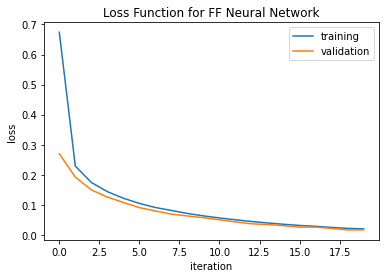

In [19]:
pl.plot(np.array(history.history['loss']), label="training")
pl.plot(np.array(history.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.title("Loss Function for FF Neural Network")
pl.legend()

In [20]:
output = model.predict(x_test)

In [21]:
output.shape

(10000, 10)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [24]:
#take the output of the 10 neurons containing weights, and use
#argmax to find the actual output digits that are a result of the NN
output1=np.argmax(output,axis=1)

In [29]:
output1.shape

(10000,)

In [25]:
#Classification output:
output1

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
y_test1 = np.argmax(y_test,axis=1)

In [33]:
y_test1

array([7, 2, 1, ..., 4, 5, 6])

In [46]:
count = 0
for i in range(y_test1.size):
  if y_test1[i] != output1[i]:
    count = count+1


In [50]:
accuracy = (y_test1.size - count) / y_test1.size

In [51]:
print("Neural Netowork Accuracy:", accuracy)

Neural Netowork Accuracy: 0.9772
